In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
# **********DATA CLEANING********

In [3]:
# To read csv file
df = pd.read_csv('SuperStore_Sales_Datasetc.csv')

In [4]:
# To find how many coloumns and rows
df.shape

(5901, 23)

In [5]:
# To see 5 columns
df.head(5)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [7]:
# To give 0 to null values of returns
df['Returns'] = df['Returns'].fillna(0)

In [8]:
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns                0
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

In [9]:
# # Here we to delete ind1 and ind2 because it has no value
df = df.dropna(axis='columns')

In [10]:
df.isnull().sum()

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns             0
Payment Mode        0
dtype: int64

In [11]:
# To see all columns
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [12]:
# To describe() method returns description of the data in the DataFrame(i.e count,mean,std etc)
df.describe()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
count,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,5022.422471,265.345589,3.781901,29.700408,0.048636
std,2877.977184,474.260645,2.212917,259.589138,0.215124
min,1.000000,0.836000,1.000000,-6599.978000,0.000000
25%,2486.000000,71.976000,2.000000,1.795500,0.000000
50%,5091.000000,128.648000,3.000000,8.502500,0.000000
75%,7456.000000,265.170000,5.000000,28.615000,0.000000
max,9994.000000,9099.930000,14.000000,8399.976000,1.000000


In [13]:
# To describe specific columns
df[['Sales','Profit']].describe()

,Sales,Profit
count,5901.000000,5901.000000
mean,265.345589,29.700408
std,474.260645,259.589138
min,0.836000,-6599.978000
25%,71.976000,1.795500
50%,128.648000,8.502500
75%,265.170000,28.615000
max,9099.930000,8399.976000


In [23]:
# ********************EXPLORATORY DATA ANALYSIS************************

In [14]:
# Highest, Lowest, Avg Profit
df['Profit'].max()


8399.976

In [15]:
df['Profit'].min()

-6599.978

In [16]:
df['Profit'].mean()

29.70040771055753

In [17]:
# Highest, Lowest, Avg Sales
df['Sales'].max()

9099.93

In [18]:
df['Sales'].min()


0.836

In [19]:
df['Sales'].mean()

265.3455894255211

In [20]:
# Highest, Lowest, Avg Quantity
df['Quantity'].max()

14

In [21]:
df['Quantity'].min()

1

In [22]:
df['Quantity'].mean()

3.7819013726487034

In [23]:
# How many customers are from Los Angeles
len(df[df['City']=='Los Angeles'])

430

In [24]:
# How many customer are from different region
len(df[df['Region']=='Central'])

1381

In [25]:
len(df[df['Region']=='East'])

1688

In [26]:
len(df[df['Region']=='South'])

931

In [27]:
len(df[df['Region']=='West'])

1901

In [28]:
#How many customers are from Standard class and first class
df['Ship Mode']

0       Standard Class
1       Standard Class
2       Standard Class
3          First Class
4       Standard Class
             ...      
5896    Standard Class
5897    Standard Class
5898    Standard Class
5899    Standard Class
5900    Standard Class
Name: Ship Mode, Length: 5901, dtype: object

In [29]:
len(df[df['Ship Mode']=='Standard Class'])

3451

In [30]:
len(df[df['Ship Mode']=='First Class'])

959

In [31]:
# Get Highest Payment Mode
df['Payment Mode'].mode()

0    COD
Name: Payment Mode, dtype: object

In [32]:
# All counts of payment mode
df['Payment Mode'].value_counts()

Payment Mode
COD       2453
Online    2164
Cards     1284
Name: count, dtype: int64

In [33]:
# Top preffered ship mode
df.groupby(['Ship Mode'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Ship Mode,Sales
3,Standard Class,912401.0388
2,Second Class,314508.0640
0,First Class,242936.7194
1,Same Day,95958.5010


In [34]:
# Top 10 preffered sales of sub category
df.groupby(['Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

,Sub-Category,Sales
13,Phones,196563.546
5,Chairs,181945.998
3,Binders,174978.390
14,Storage,150341.318
0,Accessories,122301.086
16,Tables,119293.743
12,Paper,99453.612
9,Furnishings,92691.218
11,Machines,91987.561
1,Appliances,80305.247


In [35]:
# Sales of category
df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Category,Sales
1,Office Supplies,643707.6870
2,Technology,470587.9910
0,Furniture,451508.6452


In [42]:
# customer name who has highest sales
df.groupby(['Customer Name'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).max()

Customer Name    Zuschuss Donatelli
Sales                     11596.974
dtype: object

In [46]:
# customer id who has lowest sales
df.groupby(['Customer ID'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).max()

Customer ID     ZD-21925
Sales          11596.974
dtype: object

In [38]:
# ***************VISUALISATION OF DATA*****************

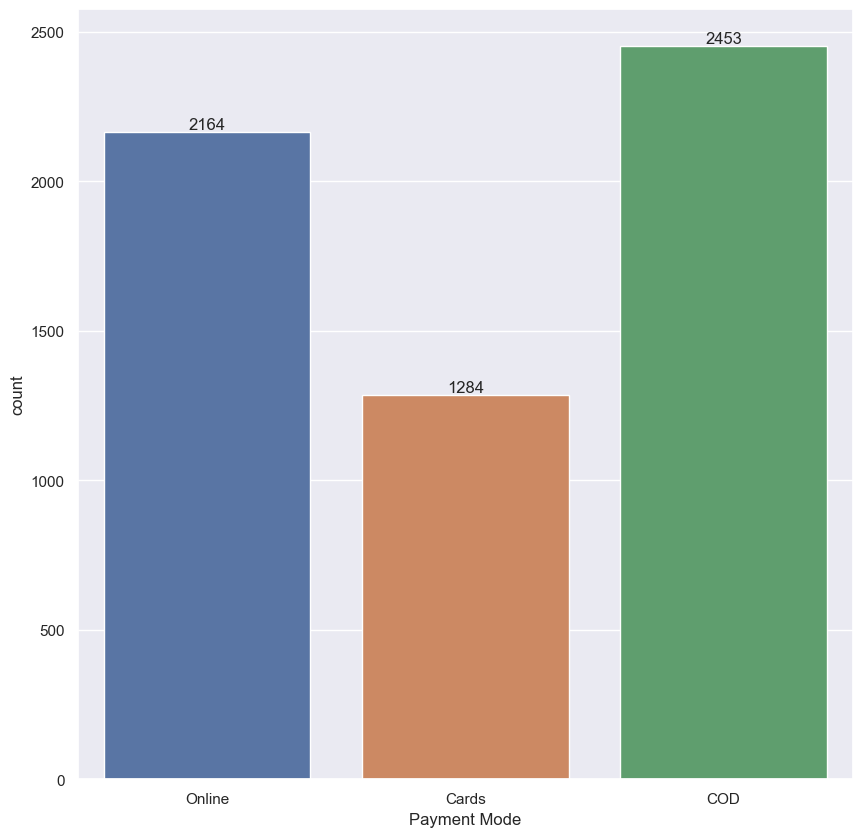

In [44]:
# To see all counts payment mode
ax=sns.countplot(x='Payment Mode',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Sales'>

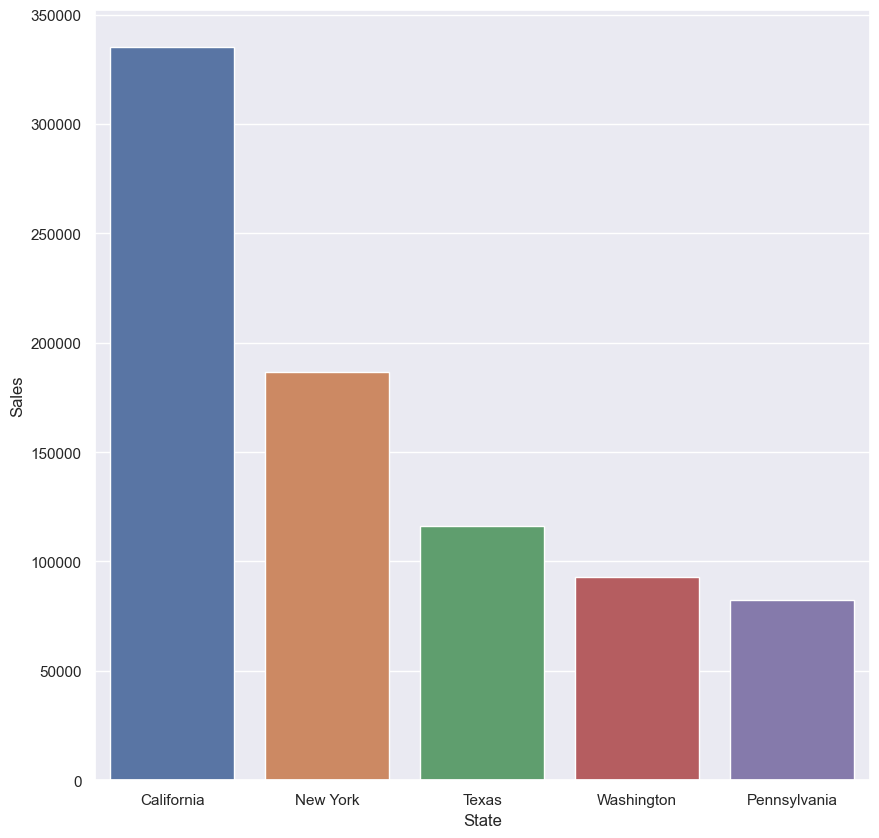

In [40]:
#Stae vs Sales analysis
sales_gen=df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(5)#group 5 values
sns.set(rc={'figure.figsize':(10,10)})#defining size of graph
sns.barplot(x='State',y='Sales',data=sales_gen)#To plot


<Axes: xlabel='Category', ylabel='Sales'>

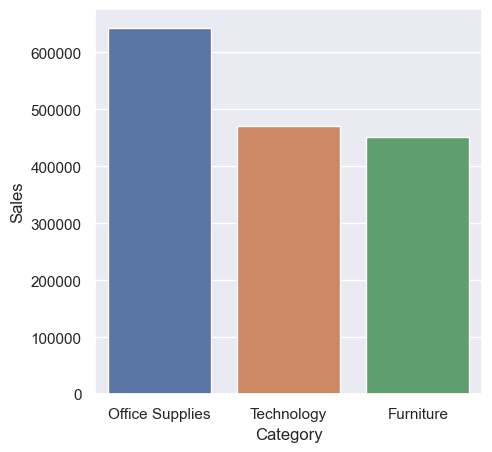

In [45]:
#Plottling of sales vs category
sg=df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})#defining size of graph
sns.barplot(x='Category',y='Sales',data=sg)#To plot